# Arrays
|Time-Complexity|Action|
|---------------|------|
|$O(1)$|Access Time|
|$O(n-i)$|Deletion Time|
|$O(n-i)$|Insertion Time|

Q. Your input is an array of integers. You have to reorder entries in such a way that even entries appear first.
Try it without allocating any additional space.

My Try With Py

In [4]:
def even_odd(A):
    next_even, next_odd = 0, len(A) - 1
    while next_even <= next_odd:
        if A[next_even] % 2 == 0:
            next_even += 1
        else:
            A[next_even], A[next_odd] = A[next_odd], A[next_even]
            next_odd -= 1

[4, 2, 3, 5, 1, 1]

list1 = list2

In [14]:
A = [1, 3, 2, 6]
B = A
B[3] = 2
print(A)
print(B)

[1, 3, 2, 2]
[1, 3, 2, 2]


list1 = list(list2)

In [17]:
A = [1, 3 ,2 ,6]
B = list(A)
B[3] = 2
print(A)
print(B)

[1, 3, 2, 6]
[1, 3, 2, 2]


## Shallow Copy vs Deep Copy

In [21]:
#Shallow copy
import copy
l1 = [1, 2, [3, 4], 5]
l2 = copy.copy(l1)
l1[0] = 4
l1[2][0] = 9
l2

[1, 2, [9, 4], 5]

In [ ]:
#Deep Copy
l1 = [1, 2, [3, 4], 5]
l2 = copy.deepcopy(l1)
l1[2][0] = 9
l2

## Bisect
* bisect.bisect_left
* bisect.bisect_right | bisect.bisect
* insort_left
* insert_right | insort

In [3]:
import bisect
A = [1, 7, 6]
bisect.insort(A, 3)
A

[1, 3, 7, 6]

## Dutch National Flag problem
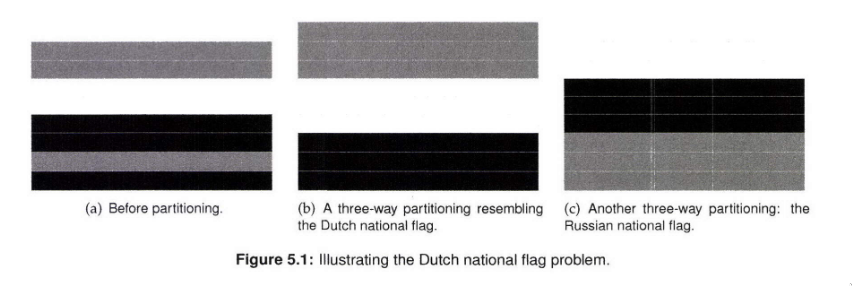

Q. Write a program that takes an array A and an index i into A, and rearranges the elements such that all elements less than A\[i\](the "pivot") appears first, followed by elements equal to the pivot, and followed by elements greater than the pivot.

### My Try With Py (not working correctly)
The problem comes in my approach comes when i have to group the numbers equal to pivot.
I set pivot in the end. so i don't know where to place the numbers equal to pivot as location is unknown until the end of loop.
So, another approach is to keep shifting or swapping the numbers shorter or larger and leave the number equal to pivot and they will automatically collect at a place.

In [43]:
def dutch_national_flag(A, i):
    pivot = A[i]
    l = 0
    r = len(A) - 1
    while (l < r):
        while (l < r and A[l] < pivot):
            l += 1
        while (l < r and A[r] >= pivot):
            r -= 1
        A[l], A[r] = A[r], A[l]
    A[l-1], A[i] = A[i], A[l-1]

A = [0,2,9,0,3,9,7]
dutch_national_flag(A, 2)
A

[0, 7, 2, 0, 3, 9, 9]

### Naive Implementation
time complexity = $O(n^2)$
Space complexity = $O(1)$

In [37]:
RED, WHITE, BLUE = range(3)

def dutch_flag_partition(A, pivot_index):
    pivot = A[pivot_index]
    # First pass: group smaller than pivot
    for i in range(len(A)):
        for j in range(i+1, len(A)):
            if A[j] < pivot:
                A[i], A[j] = A[j], A[i]
                break
    # Second pass: group elements larger than pivot
    for i in range(len(A)):
        if A[i] < pivot:
            break
        # Look for a larger element. Stop when we reach an element
        # less than pivot, since first pass has moved them to the
        # start of A.
        for j in reversed(range(i)):
            if A[j] > pivot:
                A[i], A[j] = A[j], A[i]
                break
A = [0,2,7,0,3,9,7]
dutch_flag_partition(A, 2)
A

[2, 0, 0, 3, 7, 9, 7]

### Better Approach
Time Complexity: $O(n)$
Space Complexity: $O(1)$

In [41]:
RED, WHITE, BLUE = range(3)

def dutch_flag_partition(A, pivot_index):
    pivot = A[pivot_index]
    # First pass: group all elements smaller than pivot.
    smaller = 0
    for i in range(len(A)):
        if A[i] < pivot:
            A[i], A[smaller] = A[smaller], A[i]
            smaller += 1
    
    # Second Pass: group elements larger than pivot
    larger = len(A) - 1
    for i in reversed(range(len(A))):
        if A[i] < pivot:
            break
        elif A[i] > pivot:
            A[i], A[larger] = A[larger], A[i]
            larger -= 1

A = [0,2,7,0,3,9,7]
dutch_flag_partition(A, 2)
A

[0, 2, 0, 3, 7, 7, 9]

### Another Approach
grouping in three subarrays:
* shorter
* equal
* larger

In [54]:
def dutch_flag_partition(A, pivot_index):
    shorter, equal, larger = 0, 0, len(A)-1
    pivot = A[pivot_index]
    
    while equal < larger:
        if A[equal] < pivot:
            A[equal], A[shorter] = A[shorter], A[equal]
            shorter, equal = shorter + 1, equal + 1
        elif A[equal] == pivot:
            equal += 1
        else:
            larger -= 1
            A[equal], A[larger] = A[larger], A[equal]

A = [0,2,7,0,3,9,7]
dutch_flag_partition(A, 1)
A

[0, 0, 2, 3, 9, 7, 7]

### Other variants of this question
1. Assuming that keys take one of three values, reorder the array so that all objects with the same key appear together. The order of the subarrays is not important. For example, both Figures 5.1(b) and 5.1(c) on Page 40 are valid answers for Figure 5.1(a) on Page 40. Use O(1) additional space and o(n) time.

2. Given an array A of n objects with keys that take one of four values, reorder the array so that all objects that have the smae key appear together. Use O(1) additional space and O(n) time.

3. Given an array A of n objects with Boolean-Valued keys, reorder the array so that objects have key false appear first. O(1) additional space and O(n) time. The relative ordering of key true should not change.

## Increment an Arbitrary-precision integer

Q. Write a program which takes as input an array of digits encoding a nonnegative decimal integer D and updates the array to represent the integer D + 1. For example, if the input is (1,2,9) then you should update the array to (1,3,0). Your algorithm should work even if it is implemented in a language that has finite-precision arithmetic.

### My Try With Py

In [82]:
def plus_one(A):
    carry = 1
    for i in reversed(range(len(A))):
        if carry == 0:
            break
        temp = A[i]
        A[i] = (A[i] + carry) % 10
        carry = 1 if temp + carry >= 10 else 0
    if carry == 1:
        # A.insert(0, 1) # insert will cause n shifts
        # so to counter shifts we can do following
        A[0] = 1
        A.append(0)

A = [9, 9, 9]
plus_one(A)
A

[1, 0, 0, 0]

### Other variants
1. Write a program which takes as input two strings s and t of bits encoding binary numbers $B_s$ and $B_t$ and returns a new string of bits representing the number $B_s$ + $B_t$.

## Multiply Two Arbitrary-Precision integers

Write a program that takes two arrays representing integers, and retums an integer representing their product. For example, since 193707721 x -761838257287 = -147573952589676412927, if the inputs are (1,9,3,7,0,7,7,2, 1) and (-7,6,L,8,3,8,2,5,7,2,8,7), your function should return (-1,4,7,5,7,3,9,5,2,5,8,9,6,7,6,4,1,2,9,2,7).

### My Try With Py

In [23]:
def multiply(A, B):
    a = b = 0
    
    # using horner's rule converting both arrays into integer
    for i in range(len(A)):
        a = 10 * a + abs(A[i])
    for i in range(len(B)):
        b = 10 * b + abs(B[i])
        
    # multiplying two numbers
    c = list(map(int, str(a * b)))
    
    sign = -1 if (A[0] < 0) ^ (B[0] < 0) else 1
    c[0] = sign * c[0]
    return c

multiply([-2], [-3,4])

[6, 8]

### Book Solution

## Advancing through an Array

Q. Write a program which takes an array of n integers, where A\[i\] denotes the maximum you can advance from index i, and returns whether it is possible to advance to the last index starting from the beginning of the array.

### My try with Py

In [76]:
def can_reach_end(A):
    l = r = 0
    mx_reach = 0
    while r < len(A)-1:
        for j in range(l, r+1):
            mx_reach = max(mx_reach, j + A[j]) 
        if mx_reach <= r:
            break
        l = r + 1
        r = mx_reach
    else:
        return True
    return False
can_reach_end([2,0,2,0,1])

True

### Better Approach (better code)

In [ ]:
def can_reach_end(A):
    furthest_reach_so_far, last_index = 0, len(A) - 1
    i = 0
    while i <= furthest_reach_so_far and furthest_reach_so_far < last_index:
        furthest_reach_so_far = max(furthest_reach_so_far, A[i] + i)
        i += 1
    return furthest_reach_so_far >= last_index

## Delete Duplicates from a sorted array

Q. Write a program which takes as input a sorted array and updates it so that all duplicates have been removed and the remaining elements have been shifted left to fill the emptied indices. Return the number of valid elements. Many languages have library functions for performing this operation you cannot use these functions.

### BruteForce O($n^2$) (My Try)

In [38]:
def delete_duplicate(A):
    curr = A[0]
    i = 1
    while i < len(A):
        if curr == A[i]:
            A.remove(curr)
            i -= 1
        else:
            curr = A[i]
        i += 1
A = [0,0,0,0,1,1,1,2,2,2,3,9,9]
delete_duplicate(A)
A

[0, 1, 2, 3, 9]

### Better Solution O($n$) Time and O(1) Space (My Try)
First figuring out where to write and then looping over array with `r` pointer and write at the position where `writer` points and move `l` to `r` and `r` to `r+1` and increment `writer`.
Now all distinct values are at a place. So from writer to end of list make it zero.

In [84]:
def delete_duplicates(A):
    l = 0
    r = writer = 1
    
    while r < len(A) and A[l] != A[r]:
        l, r = l + 1, r + 1
    writer = r
    
    while r < len(A):
        while r < len(A) and A[l] == A[r]:
            r += 1
        if r < len(A):
            A[writer] = A[r]
            l, r, writer = r, r+1, writer+1
            
    A[writer:] = [0] * len(A[writer:])

A = [0,0,1,2,3,3,3,4]
delete_duplicates(A)
A

[0, 1, 2, 3, 4, 0, 0, 0]

### Better Solution (better code)

In [87]:
def delete_duplicate(A):
    if not A:
        return 0
    
    write_index = 1
    for i in range(1, len(A)):
        if A[write_index - 1] != A[i]:
            A[write_index] = A[i]
            write_index += 1
    return write_index

A = [0,0,1,2,3,3,3,4,5]
delete_duplicate(A)
A

[0, 1, 2, 3, 4, 5, 3, 4, 5]

### Variants

Q.  Implement a function which takes as input an array and a key, and updates the array so that all occurrences of the input key have been removed and the remaining elements have been shifted left to fill the emptied indices. Return the number of remaining elements. There are no requirements as to the values stored beyond the last valid element

Q. Write a program which takes as input a sorted array A of integers and a positive integer m, and updates A so that if x appears z times in A it appears exactly $min(2,m)$ times in A. The update to A should be performed in one pass, and no additional storage may be allocated.

In [97]:
# Trying Variant 2.
def solve(A):
    write_index = 1
    count = 1
    for i in range(1, len(A)):
        if A[write_index - 1] == A[i]:
            count += 1
            write_index += 1
        elif A[write_index - 1] != A[i] and count <= 2:
            count = 1
            write_index = i+1
            print(write_index, i, count)
        elif A[write_index - 1] != A[i] and count > 2:
            count = 1
            A[write_index] = A[i]
            write_index += 1
            
            
A = [1,1,2,3,3,3,4] 
solve(A) # output should be [1,1,2,3,3,0]
A

3 2 1
4 3 1


[1, 1, 2, 3, 3, 3, 4]

## Buy and Sell Stocks

Q. Write a program that takes an array denoting the daily stock price, and retums the maximum profit that could be made by buying and then selling one share of that stock. There is no need to buy if no profit is possible.

### My Try With Py
Used something similar like Kadane's Algorithm

In [8]:
def buy_and_sell_stock_once(A):
    l = 0
    max_profit = 0
    for r in range(1, len(A)):
        profit = A[r] - A[l]
        if profit < 0:
            profit = 0 
            l = r
        else:
            max_profit = max(max_profit, A[r] - A[l])
    return max_profit
buy_and_sell_stock_once([310,315,275,295,260,270,290,230,255,250])

30

### Book Approach
Finding minimum so far and then finding max profit so far.

In [19]:
def buy_and_sell_stock_once(prices):
    min_price_so_far, max_profit = float('inf'), 0
    for price in prices:
        max_profit_sell_today = price - min_price_so_far
        max_profit = max(max_profit, max_profit_sell_today)
        min_price_so_far = min(min_price_so_far, price)
    return max_profit
buy_and_sell_stock_once([310,315,275,295,260,270,290,230,255,250])

30

### Variant
Write a program that takes an array of integers and finds the length of a longest subarray all of whose entries are equal.

## Buy and Sell a stock Twice

Q. Write a program that computes the maximum profit that can be made by buying and selling a share at most twice. **The second buy must be made on another date after the first sale.**

### Approach
Since, we know that second buy must happen strictly after first buy. So, first we are going to calculate the max buy and sell once by day i and then max buy and sell on or after day i. Then adding those two arrays and finding the max.

In [4]:
def buy_and_sell_stock_twice(prices):
    max_total_profit, min_price_so_far = 0.0, float("inf")
    first_buy_sell_profits = [0] * len(prices)
    # max buy and sell once by day i.
    for i, price in enumerate(prices):
        min_price_so_far = min(price, min_price_so_far)
        profit = price - min_price_so_far
        first_buy_sell_profits[i] = max(max_total_profit, profit)
    # max buy and sell once on or after day i. 
    # we need to traverse from backwards to complete in O(n) time.
    # otherwise we need to find max buy and sell once again and again O(n^2)
    # and since we are traversing from backwards we need to find max_price_so_far
    max_price_so_far = float('-inf')
    for i, price in reversed(list(enumerate(prices))):
        max_price_so_far = max(price, max_price_so_far)
        max_total_profit = max(
            max_total_profit,
            (max_price_so_far - price) + first_buy_sell_profits[i - 1] # profit + max buy and sell before current day
        )
    return max_total_profit
buy_and_sell_stock_twice([7,1,5,3,6,2,8])

11

## Computing an Alternation

In [ ]:
def alternation(A):
    for i in range(len(A)):
        A[i:i+2] = sorted(A[i:i + 2], reverse=i % 2)
A = [7,6,5,4,1,3]
alternation(A)
A

## Enumerate all primes till `n`

Q. Write a program to enumerate all primes till n.

### My Try Wity Py

In [10]:
def generate_primes(n):
    n += 1
    ls = [True] * n
    ls[0] = ls[1] = False
    for i in range(2, n):
        if ls[i] == True:
            j = 2
            while(i * j < n):
                ls[i * j] = False
                j += 1
    return [i for i in range(2, n) if ls[i] == True]
generate_primes(20)

[2, 3, 5, 7, 11, 13, 17, 19]

### Better Code

In [12]:
def generate_primes(n):
    primes = []
    is_prime = [False, False] + [True] * (n - 1)
    
    for p in range(2, n + 1):
        if is_prime[p]:
            primes.append(p)
            for i in range(p, n+1, p):
                is_prime[i] = False
    return primes
generate_primes(10)

[2, 3, 5, 7]

We can do even better for by performing sieve from $p^2$ instead of $p$.
While storage can be improved by removing space for even numbers

In [15]:
def generate_prime(n):
    if n < 2:
        return []
    primes = [2]
    size = (n - 3) // 2 + 1
    is_prime = [True] * size
    for i in range(size):
        if is_prime[i]:
            p = i * 2 + 3
            primes.append(p)
            for j in range(2 * i**2 + 6 * i + 3, size, p):
                is_prime[j] = False
    return primes
generate_prime(19)

[2, 3, 5, 7, 11, 13, 17, 19]

## Permute the elements of an array

Q. Write a program to apply the given permutation to an array.

A permutation can be specified by an array P, where P[] represents the location of the element at i in the permutation. For example, the aray (2,0,1,3) represents the permutation that maps the element at location 0 to location 2, the element at location 1 to location 0, the element at location 2 to location 1, and keep the element at location 3 unchanged. A permutation can be applied to an array to reorder the array. For example, the permutation (2,0, 1,3) applied to A = (a,b,c,d) yields the array (b,c,a,d).

### My Try With Py
If we sort the permutation array with array to which we need to apply permutation to then we can achieve the desired result.

In [1]:
def apply_permutation(perm, A):
    for i in range(1, len(perm)):
        key = perm[i]
        keyA = A[i]
        j = i - 1
        while j >= 0 and perm[j] > key:
            perm[j+1] = perm[j]
            A[j+1] = A[j]
            j -= 1
        perm[j+1] = key
        A[j+1] = keyA
    return A

A = ['a', 'b', 'c', 'd']
apply_permutation([2,0,1,3], A)

['b', 'c', 'a', 'd']

In [13]:
def apply_permutation(perm, A):
    for i in range(len(A)):
        next = perm[i]
        while next > 0:
            A[i], A[next] = A[next], A[i]
            perm[i], perm[next] = perm[next], perm[i]
            perm[next] = -1
            next = perm[i]
    return A

A = ['a', 'b', 'c', 'd', 'e', 'f']
apply_permutation([2, 5, 0, 3, 1, 4], A)

['c', 'e', 'a', 'd', 'f', 'b']

## Book Solution (will do later)

## Next Permutation

### My Try With Py
Find first entry from right that is smaller than the entry immediately after then replace that entry with minimum item that is greater than it. swap them and then sort them.

In [23]:
def next_permutation(perm):
    for i in reversed(range(len(perm)-1)):
        if perm[i] < perm[i+1]:
            min_max = float("inf")
            min_pos = -1
            for j in range(i+1, len(perm)):
                if perm[i] < perm[j] and min_max > perm[j]:
                    min_max = perm[j]
                    min_pos = j
            perm[i], perm[min_pos] = perm[min_pos], perm[i]
            perm[i+1:] = sorted(perm[i+1:]) # should have used reversed instead of sorted
            break
A = [0,1,2,3,4]
print(A)
for i in range(5):
    next_permutation(A)
    print(A)

[0, 1, 2, 3, 4]
[0, 1, 2, 4, 3]
[0, 1, 3, 2, 4]
[0, 1, 3, 4, 2]
[0, 1, 4, 2, 3]
[0, 1, 4, 3, 2]


### Book Approach
Logic is same as above but we can see that we don't need to do sorting as suffix(all the elements after smaller element are already in decreasing order even after swapping so we can just reverse it and it will have an overall effect of sorting it.
+
some cleaner code

In [24]:
def next_permutation(perm):
    inversion_point = len(perm) - 2
    # finding inversion point
    while (inversion_point >= 0
           and perm[inversion_point] >= perm[inversion_point + 1]):
        inversion_point -= 1
    
    # if reached the end
    if inversion_point == -1:
        return []
    
    for i in reversed(range(inversion_point + 1, len(perm))):
        if perm[i] > perm[inversion_point]:
            perm[inversion_point], perm[i] = perm[i], perm[inversion_point]
            break
    perm[inversion_point + 1:] = reversed(perm[inversion_point + 1:])
    return perm

### Variant
- Compute the kth permutation under dictionary ordering, starting from the identity permutation.
- Given a permutation p, return the permutation corresponding to the previous permutation of p under dictionary ordering.